In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [255]:
## Lets create synthetic data point
from sklearn.datasets import make_classification

In [256]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [257]:
X

array([[ 0.14663115,  0.74881972],
       [-0.91413268,  1.01805435],
       [ 1.26605634,  1.0443036 ],
       ...,
       [ 0.36781224, -1.27069538],
       [-0.9759929 ,  1.12666457],
       [ 1.00842514, -1.00283532]])

In [258]:
y

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,

In [259]:
pd.DataFrame(X)[0]

0      0.146631
1     -0.914133
2      1.266056
3      1.081040
4      1.070043
         ...   
995   -1.238970
996    0.577003
997    0.367812
998   -0.975993
999    1.008425
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

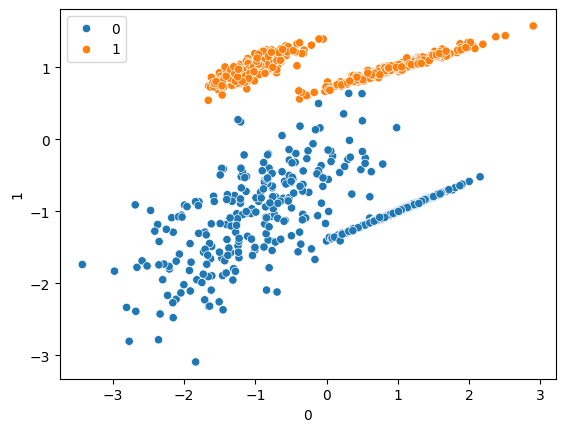

In [260]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [263]:
from sklearn.svm import SVC

In [264]:
svc = SVC(kernel="linear")

In [265]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [266]:
## Predictions
y_pred = svc.predict(X_test)

In [267]:
from sklearn.metrics import classification_report,confusion_matrix

In [268]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       133
           1       0.97      0.99      0.98       117

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[130   3]
 [  1 116]]


In [269]:
rbf=SVC(kernel='rbf')

In [270]:
rbf.fit(X_train,y_train)

SVC()

In [271]:
y_pred = rbf.predict(X_test)

In [272]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       133
           1       0.97      0.99      0.98       117

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[130   3]
 [  1 116]]


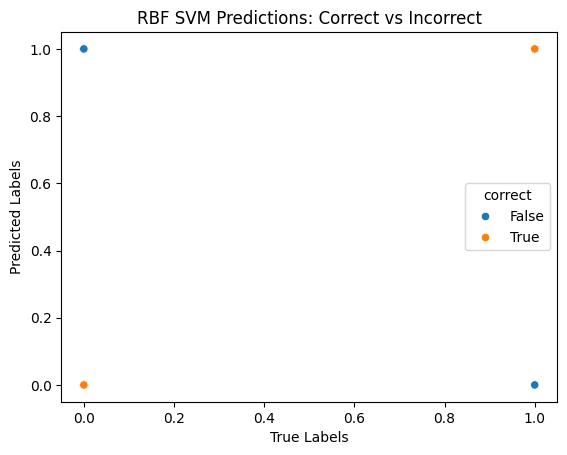

In [273]:
df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'correct': y_test == y_pred
})
sns.scatterplot(data=df, x='y_test', y='y_pred', hue='correct')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('RBF SVM Predictions: Correct vs Incorrect')
plt.show()

In [274]:
poly=SVC(kernel='poly')

In [275]:
poly.fit(X_train,y_train)

SVC(kernel='poly')

In [276]:
y_pred = poly.predict(X_test)

In [277]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       133
           1       0.98      0.99      0.99       117

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[131   2]
 [  1 116]]


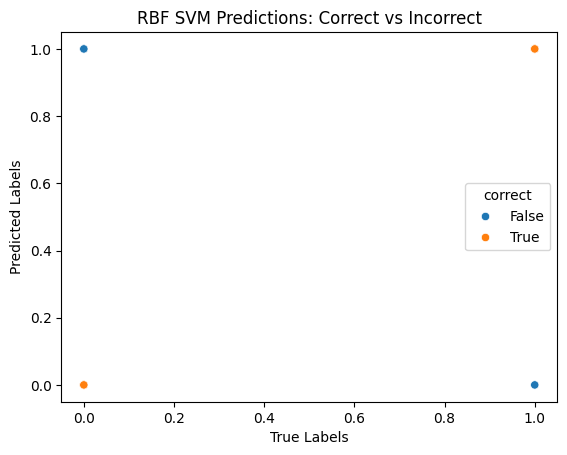

In [278]:
df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'correct': y_test == y_pred
})
sns.scatterplot(data=df, x='y_test', y='y_pred', hue='correct')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('RBF SVM Predictions: Correct vs Incorrect')
plt.show()

In [279]:
sig =SVC(kernel='sigmoid')


In [280]:
sig.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [281]:
y_pred = sig.predict(X_test)

In [282]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[127   6]
 [  4 113]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       133
           1       0.95      0.97      0.96       117

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



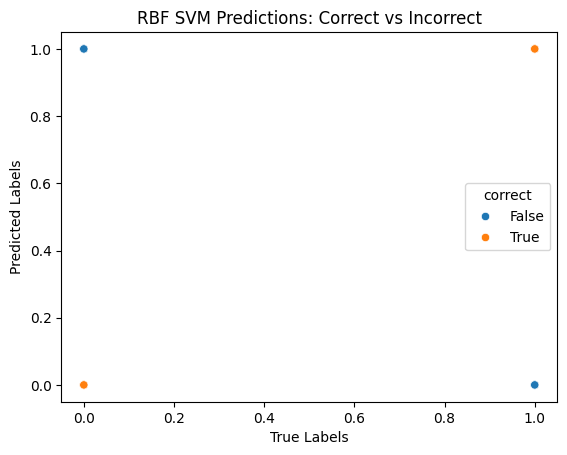

In [283]:
df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'correct': y_test == y_pred
})
sns.scatterplot(data=df, x='y_test', y='y_pred', hue='correct')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('RBF SVM Predictions: Correct vs Incorrect')
plt.show()

### Hyperparameter Tuning wiht SCV

In [284]:
from sklearn.model_selection import GridSearchCV

## Definging parameter range
param_grid = {'C':[0.1,1,10,100,1000],
              "gamma":[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

In [286]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [287]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [288]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [289]:
y_pred1=grid.predict(X_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       133
           1       0.99      0.99      0.99       117

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[132   1]
 [  1 116]]
